<h1> Problem set 5 </h1> 
Akshita Gundavarapu 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

<h2>1 When will we see BOE?</h2>

<h3> 
1.1 
</h3>

In [2]:
ice = pd.read_csv("data /ice-extent.csv.bz2", sep = "\t")
ice = ice[ice.region == "N"]
ice


,year,month,data-type,region,extent,area,time
0,1978,11,Goddard,N,11.65,9.04,1978.875000
2,1978,12,Goddard,N,13.67,10.90,1978.958333
4,1979,1,Goddard,N,15.41,12.41,1979.041667
6,1979,2,Goddard,N,16.18,13.18,1979.125000
8,1979,3,Goddard,N,16.34,13.21,1979.208333
...,...,...,...,...,...,...,...
1028,2021,9,NRTSI-G,N,4.92,3.43,2021.708333
1030,2021,10,NRTSI-G,N,6.77,5.41,2021.791667
1032,2021,11,NRTSI-G,N,9.81,8.53,2021.875000
1034,2021,12,NRTSI-G,N,12.22,10.73,2021.958333


In [3]:
ice = ice.dropna(subset=["extent"], axis=0)
ice = ice[ice.extent >= 0]
ice.shape

(517, 7)

<h3> 1.2 </h3>

In [4]:
ice1 = ice[(ice["month"] == 3) | (ice["month"] == 9) |(ice["month"] == 12)]
ice1

,year,month,data-type,region,extent,area,time
2,1978,12,Goddard,N,13.67,10.90,1978.958333
8,1979,3,Goddard,N,16.34,13.21,1979.208333
20,1979,9,Goddard,N,7.05,4.58,1979.708333
26,1979,12,Goddard,N,13.34,10.63,1979.958333
32,1980,3,Goddard,N,16.04,12.99,1980.208333
...,...,...,...,...,...,...,...
1004,2020,9,Goddard,N,4.00,2.83,2020.708333
1010,2020,12,Goddard,N,11.73,10.16,2020.958333
1016,2021,3,NRTSI-G,N,14.64,12.91,2021.208333
1028,2021,9,NRTSI-G,N,4.92,3.43,2021.708333


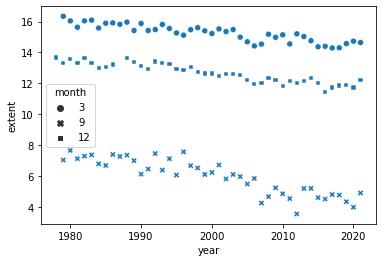

In [5]:
_ = sns.scatterplot(x ="year", y = "extent", style = "month", data = ice1)

<h3> 1.3 </h3> 

In [6]:
ice2 = ice[(ice["month"] == 9)]
m = smf.ols("extent ~ year", data = ice2).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     157.5
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.25e-15
Time:                        04:21:26   Log-Likelihood:                -32.417
No. Observations:                  43   AIC:                             68.83
Df Residuals:                      41   BIC:                             72.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.4399     12.944     13.013      0.000     142.300     194.580
year          -0.0812      0.006    -12.551      0.000      -0.094      -0.068
==============================================================================
Omnibus:                        2.573   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.525
Skew:                          -0.324   Prob(JB):                        0.467
Kurtosis:                       3.656   Cond. No.                     3.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3> 1.4 </h3> 
Interpret the coefficients. What does intercept mean? How big is yearly effect? Is it statistically significant? What about slope? What does it mean?
Note: in terms of interpeting the coefficients below, I recommend to use years relative to 2000, i.e. 1999 = −1, 2000 = 0, 2001 = 1 etc.

Intercept: In the year 2000 the extent is 168.4. 
Slope: In average, for every one year increase in time there is a 0.081 units decrease in extent. 

The results are statistically significant. 


<h3> 1.5 </h3> 

What does the intercept mean if

(a) you use years as is (1999, 2000, 2001, . . . )? 

The interceot would mean that in average in the year 0, the extent would be 168.4. This doesn't make any sense.

(b) you use years relative to 2000 (-1, 0, 1, . . . )?

The intercept would mean that in average in the year 2000 the result would be 168.4


<h3> 1.6 </h3> 
Create a plot (like what you did with Boston housing) where you show the regression line through the September data points.
Comment the plot. Do you see a trend? Do you see any accelera- tion/deceleration (i.e. the trend is getting faster/slower)

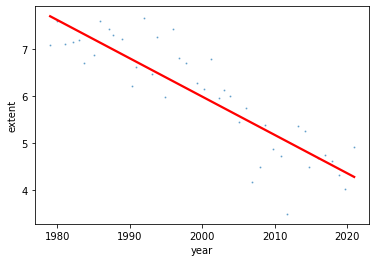

In [25]:
_ = sns.regplot(x="year", y="extent", ci=None,
                line_kws = {"color":"red"},
                scatter_kws = {"s":1, "alpha":0.5},
                x_jitter=0.3, y_jitter=0.2,
                data= ice2)

<h3> 1.7 </h3> 
Based on your linear prediction: when will your trend line hit 0 and we will have BOE?
Note: such predictions are highly speculative as we ignore the physical reality of the polar regions.
Note 2: your figure tells when will the trend reach zero. The first BOE will probably happen 10-20 years earlier as the yearly extent jumps up and down around the trend.



From the graph it seems like the line would hit zero somewhere between 2030 and 2035.

<h3> 1.8 </h3> 
Repeat these calculations for March—the month of the yearly maximum. When will the Arctic be completely ice free (if the current trends continue)?


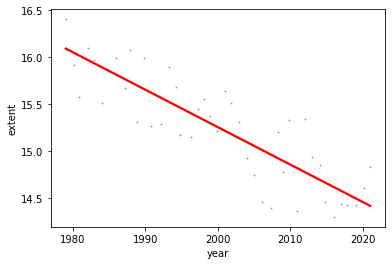

In [26]:
ice3 = ice[(ice["month"] == 3)]
_ = sns.regplot(x="year", y="extent", ci=None,
                line_kws = {"color":"red"},
                scatter_kws = {"s":1, "alpha":0.5},
                x_jitter=0.3, y_jitter=0.2,
                data= ice3)

The artic might be completely cleared around 2030 if this trent continues. 

<h2> 2 How Is Basketball Game Score Calculated? </h2> 

<h3> 2.1 </h3>

In [15]:
ball = pd.read_csv("data /harden-18-19.csv.bz2", sep = ",")
ball.describe()

,Rk,G
count,82.000000,78.000000
mean,41.500000,39.500000
std,23.815261,22.660538
min,1.000000,1.000000
25%,21.250000,20.250000
50%,41.500000,39.500000
75%,61.750000,58.750000
max,82.000000,78.000000


<h3> 2.2

In [21]:
print(ball.Date.min(), ball.Date.max())
print(ball.shape)

2018-10-17 2019-04-09
(82, 30)


<h3> 2.3

In [8]:
enforce_numeric_cols = ball.columns[ball.columns.get_loc('FG'):]
for c in enforce_numeric_cols:
    ball = ball[pd.to_numeric(ball[c], errors='coerce').notnull()]
    ball[c] = pd.to_numeric(ball[c])
ball.describe()


,Rk,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,42.285714,39.155844,10.844156,24.480519,0.448649,4.857143,13.194805,0.373299,9.792208,11.142857,...,5.844156,6.701299,7.480519,2.038961,0.753247,4.987013,3.116883,36.337662,26.920779,4.376623
std,23.224226,22.603019,3.103754,6.373486,0.086460,2.168642,3.930444,0.144508,4.894513,5.340299,...,2.833377,3.103754,3.462621,1.499487,0.829646,2.074237,1.277065,10.241313,9.943106,14.394845
min,1.000000,1.000000,5.000000,14.000000,0.259000,0.000000,4.000000,0.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,15.000000,1.200000,-27.000000
25%,23.000000,20.000000,9.000000,19.000000,0.393000,3.000000,11.000000,0.304000,6.000000,7.000000,...,4.000000,4.000000,5.000000,1.000000,0.000000,4.000000,2.000000,29.000000,21.600000,-8.000000
50%,42.000000,39.000000,10.000000,24.000000,0.450000,5.000000,12.000000,0.375000,9.000000,10.000000,...,6.000000,6.000000,7.000000,2.000000,1.000000,5.000000,3.000000,35.000000,25.800000,5.000000
75%,62.000000,58.000000,13.000000,30.000000,0.500000,6.000000,16.000000,0.444000,14.000000,15.000000,...,8.000000,9.000000,10.000000,3.000000,1.000000,6.000000,4.000000,42.000000,32.200000,14.000000
max,82.000000,78.000000,19.000000,39.000000,0.714000,10.000000,23.000000,0.833000,22.000000,27.000000,...,13.000000,15.000000,17.000000,6.000000,4.000000,11.000000,6.000000,61.000000,52.200000,39.000000


<h3> 2.4

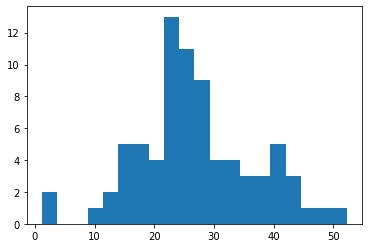

In [9]:
_ = plt.hist(ball.GmSc, bins = 20)

In [10]:
print(ball.GmSc.mean(), ball.GmSc.std())
print(ball.GmSc.max() - ball.GmSc.min())

26.920779220779227 9.943105753053453
51.0


Analyze the game score GmSc. What is its distribution? Which distribution does the histogram resemble? Range? Mean? Standard deviation?

The distribution seems uniform. It resembles a normal distribution. 

<h3> 2.5

In [11]:
m5 = smf.ols("GmSc ~ FGA", data = ball).fit()
m5.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     13.80
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           0.000389
Time:                        04:21:29   Log-Likelihood:                -279.11
No. Observations:                  77   AIC:                             562.2
Df Residuals:                      75   BIC:                             566.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8653      4.186      2.834      0.006       3.526      20.205
FGA            0.6150      0.166      3.715      0.000       0.285       0.945
==============================================================================
Omnibus:                        0.436   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.589
Skew:                          -0.141   Prob(JB):                        0.745
Kurtosis:                       2.677   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Display the results and answer the following questions:

(a) What is the interpretation of Intercept (β0)?
In average the Game score is 11.9 when the FGA is zero.

(b) What is the interpretation of FGA (β1)? Is it statistically signif- icant?
In average, with every one unit increase in FGA there is a 0.62 units increase in game score. This result is statistically significant.

<h3> 2.6

In [12]:
m6 = smf.ols("GmSc ~ FG + FGA", data = ball).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     48.07
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           4.18e-14
Time:                        04:21:29   Log-Likelihood:                -253.56
No. Observations:                  77   AIC:                             513.1
Df Residuals:                      74   BIC:                             520.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0773      3.078      2.299      0.024       0.944      13.211
FG             3.3400      0.400      8.349      0.000       2.543       4.137
FGA           -0.6690      0.195     -3.434      0.001      -1.057      -0.281
==============================================================================
Omnibus:                        2.539   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.689
Skew:                           0.126   Prob(JB):                        0.430
Kurtosis:                       2.320   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a) What is the interpretation of FG? Is it statistically significant?
In Average, fopr every one unit increase in FG there is a 3.34 units increase in Game score given that FGA remains the same. This is Statistically significant.  

(b) What is the interpretation of FGA (β2)? Is it statistically signif- icant?
In Average, fopr every one unit increase in FGA there is a 0.67 units decrease in Game score given that FGA remains the same. This is Statistically significant. 

(c) How do you explain the fact that model 5 shows positive and model 6 shows a negative estimate for FGA? There is a very easy an intuitive explanation that everyone will understand. Can you figure out what it is?

Model 5 is a line while, model 6 is a surface. This model will have a positive slope of one slde of the plane and negative slope on another side of the plane. 

(d) What is the R2 of the model? How does it compare to the model 5? What do you conclude from this comparison?
R2 is bigger for model 6 than for model 5. 
<h3> 2.7

In [13]:
ball = ball.rename(columns={"3PA": "threePA", "3P": "threeP"})
m7 = smf.ols("GmSc ~ FG + FGA + FT + FTA + ORB + DRB + AST + STL + BLK + TOV + PF + threePA + threeP", data = ball).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.721e+29
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        04:21:29   Log-Likelihood:                 2263.0
No. Observations:                  77   AIC:                            -4498.
Df Residuals:                      63   BIC:                            -4465.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.153e-14   3.27e-14     -0.966      0.338   -9.68e-14    3.37e-14
FG             2.4000   3.98e-15   6.02e+14      0.000       2.400       2.400
FGA           -0.7000   2.31e-15  -3.03e+14      0.000      -0.700      -0.700
FT             1.4000   5.21e-15   2.69e+14      0.000       1.400       1.400
FTA           -0.4000   4.72e-15  -8.48e+13      0.000      -0.400      -0.400
ORB            0.7000    6.1e-15   1.15e+14      0.000       0.700       0.700
DRB            0.3000   2.28e-15   1.31e+14      0.000       0.300       0.300
AST            0.7000   1.72e-15   4.07e+14      0.000       0.700       0.700
STL            1.0000   3.88e-15   2.58e+14      0.000       1.000       1.000
BLK            0.7000   7.11e-15   9.84e+13      0.000       0.700       0.700
TOV           -1.0000   2.89e-15  -3.47e+14      0.000      -1.000      -1.000
PF            -0.4000   4.39e-15  -9.12e+13      0.000      -0.400      -0.400
threePA     4.441e-16   2.99e-15      0.149      0.882   -5.53e-15    6.42e-15
threeP         1.0000   4.42e-15   2.26e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        2.497   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                2.078
Skew:                          -0.401   Prob(JB):                        0.354
Kurtosis:                       3.058   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a) How do standard errors and t-values look like in this model?

The t-values and standard errors of this model are very small. 

(b) What is R2 of this model? What does it tell you about how game score is calculated?

R2 for this model is 1. This tells us how much of the varaiantion is explained by the model. This model has an R2 of 1 which would mean that the model fits eactly onto the data. 

(c) What do the results tell about turnover (TOV)? Is it good or bad for the team?

TOV seems bad for the team because with every one unit increase in TOV there is a 1 unit decrease in Game Score, in average when all other variables remain the same. 

<h3> 2.8 </h3> 

Finally, consult the game score explanation at https://www.nbastuffer.com/analytics101/game-score/. Did you recover the same formula?

The model 7 mainly matches the formula given in the website. The coffecients mainly match the ones in the formula. 

<h2> 3 Interpret regression results in the literature </h2> 

<h3> 3.1 </h3> 

Do those who have a partner have better mental health (as mea- sured by PHQ-9)? Is the effect statistically significant?

In Average those who have a parter improves mental health. Thisresult is statistically insignificant. 

<h3> 3.2 </h3> 

What is the effect of COVID exposure? Is it improving or wors- ening mental health? Is the effect statistically significant?

In average, Covid exposure is worsens mental health. This result is also statistically insignificant.

<h3> 3.3 </h3> 

How is Financial distress related to mental health? Is the effect statistically significant?

In average, Financial distress exposure is worsens mental health. This result is also statistically significant.

<h2> Finally </h2> 

Tell us how many hours did you spend on this PS?

28

